<a href="https://colab.research.google.com/github/TenKim0503/Financial_Engineering/blob/main/practice_Basic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This is a practice for Financial Engineering(1) Lecture in Yonsei. Univ.(Prof. Kim) link: https://www.youtube.com/watch?v=khCa9B8bf3Y

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [4]:
 url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.isna().sum()
dataset = dataset.dropna()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0) #frac=0.8 : Use 80% of data, random_state=0 : fix the sample which I used. 
test_dataset = dataset.drop(train_dataset.index)   #the rest of train_dataset.index equals to test_dataset                      

In [6]:
train_features = train_dataset.copy() #copy the dataset for features
test_features = test_dataset.copy() #copy the dataset for features
train_labels = train_features.pop('MPG') #the dependent variable 'MPG'
test_labels = test_features.pop('MPG') #the dependent variable 'MPG'

# Linear Regression without Normalization

One variable
Start with a single-variable linear regression, to predict MPG from Horsepower.

Training a model with *tf.keras* typically starts by defining the model architecture.

In [7]:
linear_regression = tf.keras.Sequential([tf.keras.layers.Dense(units=1)]) # # of node = 1

In [8]:
horsepower = np.array(train_features['Horsepower']) #Prepare the input data for the regression

In [8]:
horsepower

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
       180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
        90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
        67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
        78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
        76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
       215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
       145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
        65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
        70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
       170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
        67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
        95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,  86., 150.,
        70., 107.,  80., 150., 105., 100., 145.,  8

Run the untrained model on the first 10 horse-power values. The output won't be good, but you'll see that it has the expected shape (10,1):

In [9]:
linear_regression.predict(horsepower[:10])

array([[ 63.806793],
       [ 74.86664 ],
       [136.12115 ],
       [ 53.597706],
       [ 57.000736],
       [ 76.56815 ],
       [ 51.045433],
       [ 57.000736],
       [ 80.82194 ],
       [ 74.86664 ]], dtype=float32)

In [10]:
linear_regression.summary() #Summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Once the model is built, configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).

In [11]:
linear_regression.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use **Model.fit()** to execute the training:



In [12]:
%%time
history = linear_regression.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.75 s, sys: 158 ms, total: 2.91 s
Wall time: 2.8 s


Visualize the model's training progress using the stats stored in the *history* object.

In [13]:
hist = pd.DataFrame(history.history) 
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4.304787,4.219819,95
96,4.184137,4.569474,96
97,4.301952,4.204579,97
98,4.577919,4.348686,98
99,4.562450,4.383212,99


In [14]:
def plot_loss(history): #Make a function for visualization
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 25])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

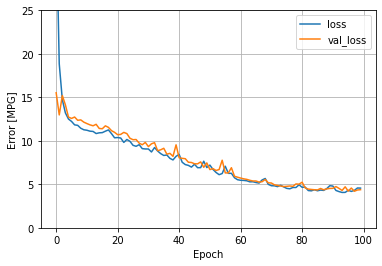

In [15]:
plot_loss(history)

Collect the results on the test set, for later:

In [16]:
test_results = {}

test_results['linear_regression'] = linear_regression.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

# Normalization
In the table of statistics it's easy to see how different the ranges of each feature are.

In [17]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. 

So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs. 



In [18]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()

In [19]:
  normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer.

In [20]:
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


When the layer is called it returns the input data, with each feature independently normalizerd:

In [22]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Linear regression with normalization

Before building a DNN model, with alinear regression.

### One Variable

Start with a single-variable linear regression, to predict `MPG` from `Horsepower`.

Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input `horsepower`.
* Apply a linear transformation ($y = mx+b$) to produce 1 output using `layers.Dense`.

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the horsepower `Normalization` layer:

In [23]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

Build the sequential model:

In [24]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `MPG` from `Horsepower`.

Run the untrained model on the first 10 horse-power values. The output won't be good, but you'll see that it has the expected shape, `(10,1)`:

In [25]:
horsepower_model.predict(horsepower[:10])

array([[-0.9271059 ],
       [-0.52360404],
       [ 1.7111754 ],
       [-1.2995692 ],
       [-1.1754148 ],
       [-0.46152684],
       [-1.3926849 ],
       [-1.1754148 ],
       [-0.3063338 ],
       [-0.52360404]], dtype=float32)

Once the model is built, configure the training procedure using the **Model.compile()** method. The most important arguments to compile are the **loss**
and the **optimizer** since these define what will be optimized **(mean_absolute_error)** and how **(using the optimizers.Adam)**.

In [32]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use **Model.fit()** to execute the training:

In [33]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.7 s, sys: 138 ms, total: 2.84 s
Wall time: 2.56 s


In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.801955,4.185105,95
96,3.804260,4.186820,96
97,3.803071,4.192672,97
98,3.802354,4.189062,98
99,3.808412,4.217451,99


You already defined the function for visualization.

In [35]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 20])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error [MPG]')
#   plt.legend()
#   plt.grid(True)

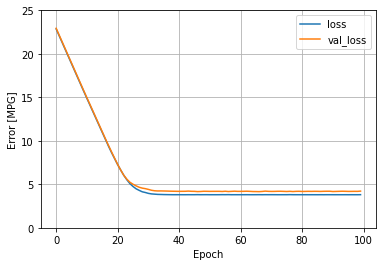

In [36]:
plot_loss(history)

Collect the results on the test set, for later:

In [37]:
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

Since this is a single variable regression it's easy to look at the model's predictions as a function of input:

In [38]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [39]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

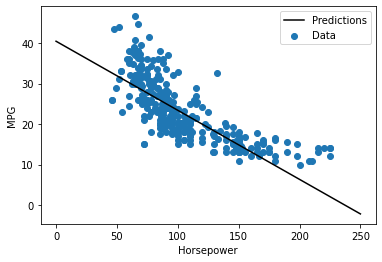

In [40]:
plot_horsepower(x,y)

#Multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same ($y = mx+ b$) except that *m* is a matrix and *b* is a vector.

This time use the *Normalization* layer that was adapted to the whole dataset.

In [41]:
#normalizer = preprocessing.Normalization()
#normalizer.adapt(np.array(train_features))

linear_model = tf. keras.Sequential([
                                     normalizer,
                                     layers.Dense(units=1)
])

When you call this model on a batch of inputs, it produces *units=1* outputs for each example.

In [42]:
linear_model.predict(train_features[:10])

array([[-1.9900378 ],
       [ 0.3588886 ],
       [ 3.102481  ],
       [-0.8325311 ],
       [-2.5489314 ],
       [ 1.6765515 ],
       [-2.6209571 ],
       [ 0.4491252 ],
       [ 0.76766944],
       [-3.001267  ]], dtype=float32)

When you call the model it's weight matrices will be built. Now you can see that the *kernel* (the $m$ in $y = mx + b$) has a shape of (9,1).

In [43]:
linear_model.layers[1].kernel #kernel = weight

<tf.Variable 'dense_2/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.7560519 ],
       [ 0.37122393],
       [ 0.4992621 ],
       [ 0.65194416],
       [ 0.6451155 ],
       [ 0.55745554],
       [ 0.06905895],
       [-0.36133868],
       [ 0.6338973 ]], dtype=float32)>

Use the same *compile* and *fit* calls as for the single input *horsepower* model:

In [44]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.74 s, sys: 137 ms, total: 2.88 s
Wall time: 2.64 s


Using all the inputs achieves a much lower training and validation error than the `horsepower` model: 

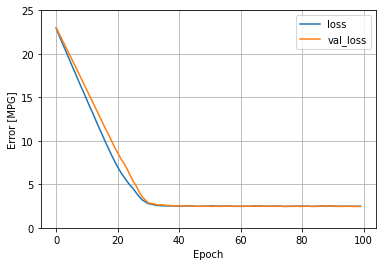

In [46]:
plot_loss(history)

Collect the results on the test set, for later:

In [47]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden"  non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer.
* Two hidden, nonlinear, `Dense` layers using the `relu` nonlinearity.
* A linear single-output layer.

Both will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [49]:
def build_and_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  
  return model

#One variable

Start with a DNN model for a single input: "Horsepower"

In [51]:
# horsepower = np.array(train_features['Horsepower'])
# horsepower_normalizer = tf.keras.experimental.preprocessing.Normalization(input_shape=[1,])
# horsepower_normalizer.adapt(horsepower), adapt: mean, variance, # of observations

dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

This model has quite a few more trinable parametes than the linear models.

In [52]:
dnn_horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [53]:
%%time
history =dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.11 s, sys: 179 ms, total: 3.29 s
Wall time: 2.93 s


This model doese slightly better than the linear-horsepower model.

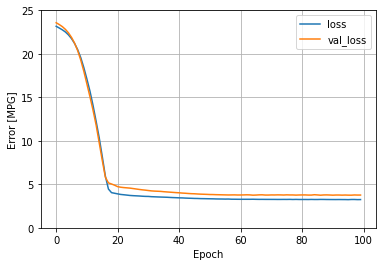

In [54]:
plot_loss(history)

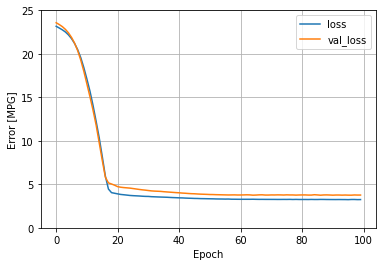

In [55]:
plot_loss(history)

If you plot the predictions as a function of `Horsepower`, you'll see how this model takes advantage of the nonlinearity provided by the hidden layers:

In [56]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

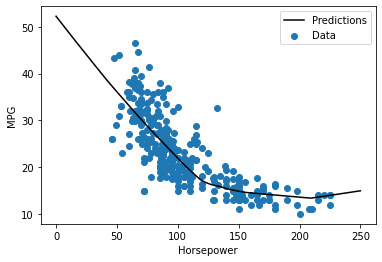

In [57]:
plot_horsepower(x, y)

Collect the results on the test set, for later:

In [58]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

#For model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [59]:
# normalizer = tf.keras.experimental.preprocessing.Normalization()
# normalizer.adapt(np.array(train_features))

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [60]:
%%time
history =dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.21 s, sys: 172 ms, total: 3.39 s
Wall time: 2.99 s


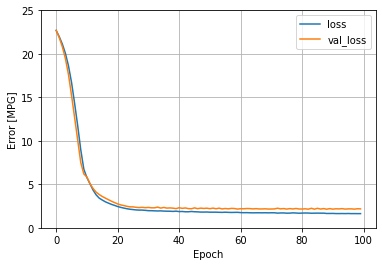

In [61]:
plot_loss(history)

In [62]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# Performance

Now that all the models are trained check the test-set performance and see how they did:

In [63]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_regression,4.358491
horsepower_model,3.645324
linear_model,2.525859
dnn_horsepower_model,2.926973
dnn_model,1.704777


These results match the validation error seen during training.

#Make predictions

Finally, predict have a look at the errors made by the model when making predictions on the test set:

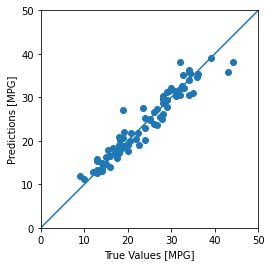

In [64]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#Similar to Normal QQplot

It looks like the model predicts reasonably well.
Now take a look at the error distribution:

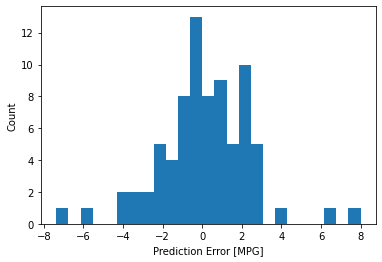

In [65]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model save it for later use:

In [66]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


If you reload the model, it gives identical output:

In [67]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [68]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_regression,4.358491
horsepower_model,3.645324
linear_model,2.525859
dnn_horsepower_model,2.926973
dnn_model,1.704777
reloaded,1.704777


## Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

* [Mean Squared Error (MSE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanSquaredError) and [Mean Absolute Error (MAE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanAbsoluteError) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
* Similarly, evaluation metrics used for regression differ from classification.
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* Overfitting is a common problem for DNN models, it wasn't a problem for this tutorial. See the [overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.
